In [1]:
import pandas as pd
from preproc import clean_posts, stop_word, filter_by_word_count, add_mbti_binary_columns

In [2]:
df = pd.read_csv('../raw_data/mbti_1.csv')
df2 = pd.read_csv('../raw_data/twitter_MBTI.csv')

In [3]:
print(df.info(), df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7811 entries, 0 to 7810
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7811 non-null   int64 
 1   text        7811 non-null   object
 2   label       7811 non-null   object
dtypes: int64(1), object(2)
memory usage: 183.2+ KB
None None


In [4]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [5]:
df['clean_text'] = df['posts'].apply(clean_posts)
df['clean_text'] = stop_word(df['clean_text'])
# df = filter_by_word_count(df, col='clean_text', min_words=1000, max_words=1700)
df = add_mbti_binary_columns(df, col_name='type')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        8675 non-null   object
 1   posts       8675 non-null   object
 2   clean_text  8675 non-null   object
 3   EI          8675 non-null   int64 
 4   SN          8675 non-null   int64 
 5   TF          8675 non-null   int64 
 6   JP          8675 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 474.5+ KB


In [7]:
df2.head()

,Unnamed: 0,text,label
0,0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj
1,1,@Hispanthicckk Being you makes you look cute||...,intj
2,2,@Alshymi Les balles sont réelles et sont tirée...,intj
3,3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj
4,4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj


In [8]:
df2['clean_text'] = df2['text'].apply(clean_posts)
df2['clean_text'] = stop_word(df2['clean_text'])
# df2 = filter_by_word_count(df2, col='clean_text', min_words=1000, max_words=1700)
df2 = add_mbti_binary_columns(df2, col_name='label')

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7811 entries, 0 to 7810
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7811 non-null   int64 
 1   text        7811 non-null   object
 2   label       7811 non-null   object
 3   clean_text  7811 non-null   object
 4   EI          7811 non-null   int64 
 5   SN          7811 non-null   int64 
 6   TF          7811 non-null   int64 
 7   JP          7811 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 488.3+ KB


In [10]:
df.head()

,type,posts,clean_text,EI,SN,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'. and moments sportscenter not top ten plays ...,0,0,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,'i'm finding the lack of me in these posts ver...,1,0,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,"'good one. of course, to which i say i know th...",0,0,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'dear , i enjoyed our conversation the other d...",0,0,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,'you're fired.. that's another silly misconcep...,1,0,1,1


In [11]:
df.drop(columns='posts', inplace=True)

In [12]:
df2.head()

,Unnamed: 0,text,label,clean_text,EI,SN,TF,JP
0,0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,INTJ,"the pope is infallible, this is a catholic dog...",0,0,1,1
1,1,@Hispanthicckk Being you makes you look cute||...,INTJ,"being you makes you look cute. on, because the...",0,0,1,1
2,2,@Alshymi Les balles sont réelles et sont tirée...,INTJ,les balles sont relles et sont tires trs rapid...,0,0,1,1
3,3,"I'm like entp but idiotic|||Hey boy, do you wa...",INTJ,"i'm like but idiotic. hey boy, do you want to ...",0,0,1,1
4,4,@kaeshurr1 Give it to @ZargarShanif ... He has...,INTJ,give it to ... he has pica since childhood. sa...,0,0,1,1


In [13]:
df2.drop(columns=['Unnamed: 0', 'text'], inplace=True)

In [14]:
df.columns

Index(['type', 'clean_text', 'EI', 'SN', 'TF', 'JP'], dtype='object')

In [15]:
df2.columns

Index(['label', 'clean_text', 'EI', 'SN', 'TF', 'JP'], dtype='object')

In [16]:
df2 = df2.rename(columns={'label': 'type'})

In [17]:
df2.columns

Index(['type', 'clean_text', 'EI', 'SN', 'TF', 'JP'], dtype='object')

In [18]:
print(df.info(), df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        8675 non-null   object
 1   clean_text  8675 non-null   object
 2   EI          8675 non-null   int64 
 3   SN          8675 non-null   int64 
 4   TF          8675 non-null   int64 
 5   JP          8675 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 406.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7811 entries, 0 to 7810
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        7811 non-null   object
 1   clean_text  7811 non-null   object
 2   EI          7811 non-null   int64 
 3   SN          7811 non-null   int64 
 4   TF          7811 non-null   int64 
 5   JP          7811 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 366.3+ KB
None None


In [19]:
df.head()

,type,clean_text,EI,SN,TF,JP
0,INFJ,'. and moments sportscenter not top ten plays ...,0,0,0,1
1,ENTP,'i'm finding the lack of me in these posts ver...,1,0,1,0
2,INTP,"'good one. of course, to which i say i know th...",0,0,1,0
3,INTJ,"'dear , i enjoyed our conversation the other d...",0,0,1,1
4,ENTJ,'you're fired.. that's another silly misconcep...,1,0,1,1


In [20]:
df2.head()

,type,clean_text,EI,SN,TF,JP
0,INTJ,"the pope is infallible, this is a catholic dog...",0,0,1,1
1,INTJ,"being you makes you look cute. on, because the...",0,0,1,1
2,INTJ,les balles sont relles et sont tires trs rapid...,0,0,1,1
3,INTJ,"i'm like but idiotic. hey boy, do you want to ...",0,0,1,1
4,INTJ,give it to ... he has pica since childhood. sa...,0,0,1,1


In [21]:
df_full = pd.concat([df, df2], ignore_index=True)

In [22]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16486 entries, 0 to 16485
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        16486 non-null  object
 1   clean_text  16486 non-null  object
 2   EI          16486 non-null  int64 
 3   SN          16486 non-null  int64 
 4   TF          16486 non-null  int64 
 5   JP          16486 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 772.9+ KB


In [40]:
df_full.to_csv('../raw_data/merge_and_clean.csv', index=False)

In [25]:
print(f"balance of the target ie : {df_full['EI'].value_counts(normalize=True)}")
print(f"balance of the target ns :{df_full['SN'].value_counts(normalize=True)}")
print(f"balance of the target tf :{df_full['TF'].value_counts(normalize=True)}")
print(f"balance of the target jp :{df_full['JP'].value_counts(normalize=True)}")

balance of the target ie : EI
0    0.72328
1    0.27672
Name: proportion, dtype: float64
balance of the target ns :SN
0    0.819605
1    0.180395
Name: proportion, dtype: float64
balance of the target tf :TF
0    0.563508
1    0.436492
Name: proportion, dtype: float64
balance of the target jp :JP
0    0.582798
1    0.417202
Name: proportion, dtype: float64


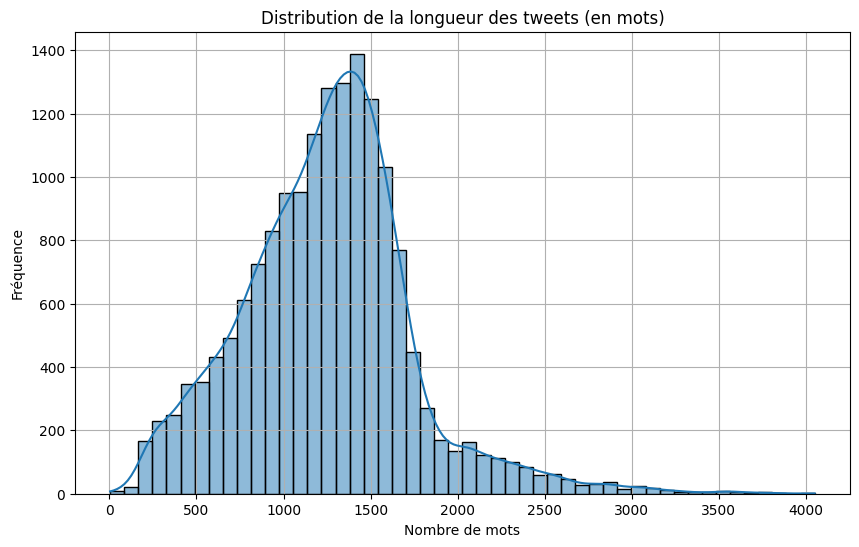

In [27]:
df_full['text_length_words'] = df_full['clean_text'].str.split().apply(len)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_full['text_length_words'], bins=50, kde=True)
plt.title("Distribution de la longueur des tweets (en mots)")
plt.xlabel("Nombre de mots")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

In [33]:
vectorizer = TfidfVectorizer(max_features=20000,
                             ngram_range=(1, 1),
                             stop_words=list(ENGLISH_STOP_WORDS)
                             )

X = vectorizer.fit_transform(df_full["clean_text"])

In [34]:
y_ie = df_full["EI"]
X_train_ie, X_test_ie, y_train_ie, y_test_ie = train_test_split(X, y_ie, test_size=0.2, random_state=42)
smote_tomek = SMOTETomek()
X_res, y_res = smote_tomek.fit_resample(X_train_ie, y_train_ie)
scale_pos_weight = sum(y_res == 0) / sum(y_res == 1)
model_ie = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight)
model_ie.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [35]:
y_pred_ie = model_ie.predict(X_test_ie)
print(classification_report(y_test_ie, y_pred_ie))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82      2397
           1       0.44      0.23      0.30       901

    accuracy                           0.71      3298
   macro avg       0.60      0.56      0.56      3298
weighted avg       0.67      0.71      0.68      3298



In [39]:
y_pred = model_ie.predict(X_test_ie)
print(confusion_matrix(y_test_ie, y_pred))
print(classification_report(y_test_ie, y_pred, digits=3))

[[2137  260]
 [ 696  205]]
              precision    recall  f1-score   support

           0      0.754     0.892     0.817      2397
           1      0.441     0.228     0.300       901

    accuracy                          0.710      3298
   macro avg      0.598     0.560     0.559      3298
weighted avg      0.669     0.710     0.676      3298



In [ ]:
y_ie = df_full["IE"]
X_train_ie, X_test_ie, y_train_ie, y_test_ie = train_test_split(X, y_ie, test_size=0.2, random_state=42)
smote_tomek = SMOTETomek()
X_res, y_res = smote_tomek.fit_resample(X_train_ie, y_train_ie)
model_ie = XGBClassifier(eval_metric='logloss')
model_ie.fit(X_res, y_res)

In [ ]:
y_pred_ie = model_ie.predict(X_test_ie)
print(classification_report(y_test_ie, y_pred_ie))

In [ ]:
y_ie = df_full["IE"]
X_train_ie, X_test_ie, y_train_ie, y_test_ie = train_test_split(X, y_ie, test_size=0.2, random_state=42)
smote_tomek = SMOTETomek()
X_res, y_res = smote_tomek.fit_resample(X_train_ie, y_train_ie)
model_ie = XGBClassifier(eval_metric='logloss')
model_ie.fit(X_res, y_res)

In [ ]:
y_pred_ie = model_ie.predict(X_test_ie)
print(classification_report(y_test_ie, y_pred_ie))

In [ ]:
ensemble = StackingClassifier(
    estimators = [("xgb", XGBClassifier(eval_metric='logloss')),
                  ("lgbm", LGBMClassifier())],
    final_estimator = LogisticRegression())

ensemble.fit(X_res, y_res)

In [ ]:
y_pred_ie = ensemble.predict(X_test_ie)
print(classification_report(y_test_ie, y_pred_ie))

In [ ]:
ensemble = StackingClassifier(
    estimators = [("xgb_ll", XGBClassifier(eval_metric='logloss')),
                  ("lgbm", LGBMClassifier()),
                  ("xgb_ap", XGBClassifier(eval_metric='aucpr'))],
    final_estimator = LogisticRegression())

ensemble.fit(X_res, y_res)

In [ ]:
y_pred_ie = ensemble.predict(X_test_ie)
print(classification_report(y_test_ie, y_pred_ie))

In [ ]:
df.to_csv('../raw_data/mbti_clean.csv', index=False)